This notebook describes some of the more complex options for defining the fitness effects of mutations.  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from clone_competition_simulation import Parameters, Gene, MutationGenerator, FixedValue, UniformDist

# multi_gene_array=False

This is the default and simplest option.  
Each new mutation in a cell combines with the previous mutations without any regard for the gene it came from.  

In [3]:
# Run a simulation where all new mutations have a fitness of 1.1
# These multiply the previous fitness of the cell
mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0)], 
                           combine_mutations='multiply'  # This is the default option
                           )

# The prexisting mutations have different fitness values
np.random.seed(1)
p = Parameters(algorithm='Moran', initial_size_array=np.ones(4), fitness_array=np.linspace(1, 1.3, 4), 
               mutation_generator=mut_gen, mutation_rates=0.1,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

s.view_clone_info()
# The fitness of clone_id 4 is 1.32 = 1.2 (the fitness of the parent clone 2) x 1.1 (the fitness of the new mut)
# The fitness of clone_id 5 is 1.452 = 1.32 (the fitness of the parent clone 4) x 1.1 (the fitness of the new mut)

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1.000,0,-1,None
1,1,0,1.100,0,-1,None
2,2,0,1.200,0,-1,None
3,3,0,1.300,0,-1,None
4,4,0,1.320,22,2,Gene1
5,5,0,1.452,32,4,Gene1
6,6,0,1.452,39,4,Gene1


In [4]:
# For comparison with later, this is the raw_fitness_array, used to calculate the overall fitness
# With multi_gene_array=False it is not very interesting, just one column
s.raw_fitness_array

array([[1.   ],
       [1.1  ],
       [1.2  ],
       [1.3  ],
       [1.32 ],
       [1.452],
       [1.452]])

In [5]:
# There are various other options as well as fitness multiplication
MutationGenerator.combine_options

('multiply', 'add', 'replace', 'max', 'min')

In [6]:
# For example, to add fitness values
mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0)], 
                           combine_mutations='add'  # Using add instead
                           )

# The prexisting mutations have different fitness values
np.random.seed(1)
p = Parameters(algorithm='Moran', initial_size_array=np.ones(4), fitness_array=np.linspace(1, 1.3, 4), 
               mutation_generator=mut_gen, mutation_rates=0.1,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

s.view_clone_info()
# Note this adds the fitness *advantage* from the new mutation. 
# So if the fitness is 1.1, there is a 0.1 advantage over neutral. 
# The fitness of clone_id 4 is now 1.3 = 1.2 + 0.1

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1.0,0,-1,None
1,1,0,1.1,0,-1,None
2,2,0,1.2,0,-1,None
3,3,0,1.3,0,-1,None
4,4,0,1.3,22,2,Gene1
5,5,0,1.4,32,4,Gene1
6,6,0,1.4,39,4,Gene1


# multi_gene_array=True

This allows much more control on the combination of fitness, but is also more complicated.   

The mutations from each gene are treated separately, and then combined after.  

Mutations within each gene are combined based on MutationGenerator.combine_mutations  
Fitness from all genes is then combined based on MutationGenerator.combine_array

In [7]:
# This is the same simulation we ran before with multi_gene_array=False
# Run a simulation where all new mutations have a fitness of 1.1
# These multiply the previous fitness of the cell
mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0)], 
                            multi_gene_array=True,
                           combine_mutations='multiply', # This is the default option
                            combine_array='multiply',  # This is also the default
                           )

# The prexisting mutations have different fitness values
np.random.seed(1)
p = Parameters(algorithm='Moran', initial_size_array=np.ones(4), fitness_array=np.linspace(1, 1.3, 4), 
               mutation_generator=mut_gen, mutation_rates=0.1,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

# The results are the same
s.view_clone_info()

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1.000,0,-1,None
1,1,0,1.100,0,-1,None
2,2,0,1.200,0,-1,None
3,3,0,1.300,0,-1,None
4,4,0,1.320,22,2,Gene1
5,5,0,1.452,32,4,Gene1
6,6,0,1.452,39,4,Gene1


In [8]:
# But compare the raw_fitness_array to earlier.  
# With multi_gene_array=True, this is now a multidimensional array
# Each row is for a clone
# The first column is a fitness from the initial clones (often wild type/neutral fitness)
# The next set of columns contain the fitness from each gene. 
# The total fitness for each clone is calculated from all the values in each row
# Here is it multplied because MutationGenerator.combine_array='multiply'
s.raw_fitness_array

array([[1.  ,  nan],
       [1.1 ,  nan],
       [1.2 ,  nan],
       [1.3 ,  nan],
       [1.2 , 1.1 ],
       [1.2 , 1.21],
       [1.2 , 1.21]])

In [9]:
# To see this along with the clone data, can use the include_raw_fitness argument
s.view_clone_info(include_raw_fitness=True)

,clone id,label,fitness,generation born,parent clone id,last gene mutated,Initial clone fitness,Gene1
0,0,0,1.000,0,-1,None,1.0,NaN
1,1,0,1.100,0,-1,None,1.1,NaN
2,2,0,1.200,0,-1,None,1.2,NaN
3,3,0,1.300,0,-1,None,1.3,NaN
4,4,0,1.320,22,2,Gene1,1.2,1.10
5,5,0,1.452,32,4,Gene1,1.2,1.21
6,6,0,1.452,39,4,Gene1,1.2,1.21


In [10]:
# With multiple genes, they take up more of the array
# If you wanted you can combine effects between genes in a different way to combining mutations within a gene
# For example, if further mutations in the same gene have no further effect, 
# we can use combine_mutations='max', 'replace', or 'min'
# But then you may want to add the fitness effects from different genes

mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0), 
                                  Gene('Gene2', FixedValue(1.05), synonymous_proportion=0)], 
                            multi_gene_array=True,
                           combine_mutations='replace',   # With FixedValue this means further mutations will do nothing
                            combine_array='add',  # Add the effects from the two genes
                           )

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=6, 
               mutation_generator=mut_gen, mutation_rates=0.15,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

# Can see that the overall fitness of each clone is the sum of the last three columns
s.view_clone_info(include_raw_fitness=True)

,clone id,label,fitness,generation born,parent clone id,last gene mutated,Initial clone fitness,Gene1,Gene2
0,0,0,1.00,0,-1,None,1.0,NaN,NaN
1,1,0,1.10,8,0,Gene1,1.0,1.1,NaN
2,2,0,1.10,13,0,Gene1,1.0,1.1,NaN
3,3,0,1.05,18,0,Gene2,1.0,NaN,1.05
4,4,0,1.15,25,2,Gene2,1.0,1.1,1.05
5,5,0,1.15,35,2,Gene2,1.0,1.1,1.05
6,6,0,1.10,48,0,Gene1,1.0,1.1,NaN


In [11]:
# There options for combination are similar
# priority is an odd case, where only the last mutated gene in the list (or the last epistatic effect) is used
# Might be relevant for cases where the knockout of one gene will override the function of downstream genes. 
MutationGenerator.combine_array_options

('multiply', 'add', 'max', 'min', 'priority')

# Epistatic effects

The combination of mutations in different genes may be more complex than simply addition or multiplication.   
Defining epistatic effects allows more control of the combinations of fitness.  

For example, this can be used for haplosufficient or haploinsufficient genes by defining a separate Gene object for each allele and an epistatic effect for when both alleles are mutated.  

In [12]:
mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0), 
                                  Gene('Gene2', FixedValue(1.05), synonymous_proportion=0)],
                            
                            # Add an epistatic effect. 
                            # If both Gene1 and Gene2 are mutated, the clone has a fitness of 3
                            # This replaces the individual effects of both genes
                            epistatics=[('Epi1', 'Gene1', 'Gene2', FixedValue(3))],
                            
                            
                            multi_gene_array=True,
                           combine_mutations='replace',   # With FixedValue this means further mutations will do nothing
                            combine_array='add',  # Add the effects from the two genes
                           )

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=6, 
               mutation_generator=mut_gen, mutation_rates=0.15,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

# Note that for the last three clones, their fitness is 3 because both genes are mutated. 
s.view_clone_info(include_raw_fitness=True)

,clone id,label,fitness,generation born,parent clone id,last gene mutated,Initial clone fitness,Gene1,Gene2,0
0,0,0,1.00,0,-1,None,1.0,NaN,NaN,NaN
1,1,0,1.10,8,0,Gene1,1.0,1.1,NaN,NaN
2,2,0,1.10,13,0,Gene1,1.0,1.1,NaN,NaN
3,3,0,1.05,18,0,Gene2,1.0,NaN,1.05,NaN
4,4,0,3.00,25,2,Gene2,1.0,1.1,1.05,3.0
5,5,0,3.00,35,4,Gene2,1.0,1.1,1.05,3.0
6,6,0,3.00,48,4,Gene1,1.0,1.1,1.05,3.0


# Checking fitness rules are correct

It can be a complex system for defining the rules for mutation combinations.   
To check that the fitness values are what is intended, you can plot the (mean) fitness of the combination of gene mutations.  
This assumes that there is at most a *single mutation per gene*. 

array([1.  , 1.1 , 1.05, 3.  ])

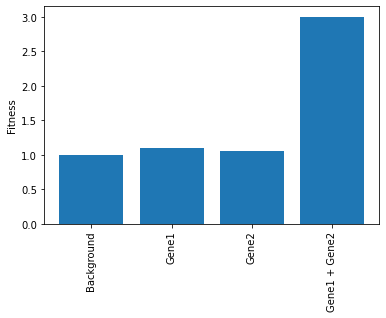

In [13]:
# Use this function from the MutationGenerator to plot the fitness of each combination of mutations. 
# This is for the epistatic example above. 
mut_gen.plot_fitness_combinations()

array([1.   , 1.1  , 1.05 , 3.   , 1.5  , 1.65 , 1.575, 4.5  ])

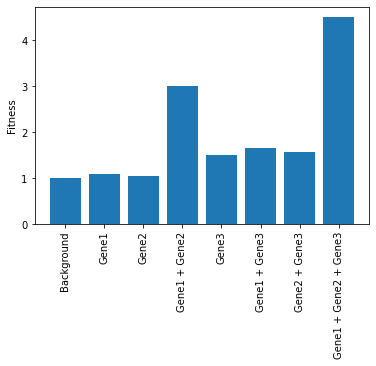

In [14]:
# Add an extra gene and change some options and check again
# For any non-FixedValue distributions of fitness effects, the mean value is used. 
mut_gen2 = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0), 
                                  Gene('Gene2', FixedValue(1.05), synonymous_proportion=0),
                                  Gene('Gene3', UniformDist(1, 2), synonymous_proportion=0)],
                            
                            epistatics=[('Epi1', 'Gene1', 'Gene2', FixedValue(3))],
                            
                            multi_gene_array=True,
                            combine_array='multiply'
                           )
mut_gen2.plot_fitness_combinations()

array([1.  , 1.1 , 1.05, 3.  , 1.5 , 1.5 , 1.5 , 3.  ])

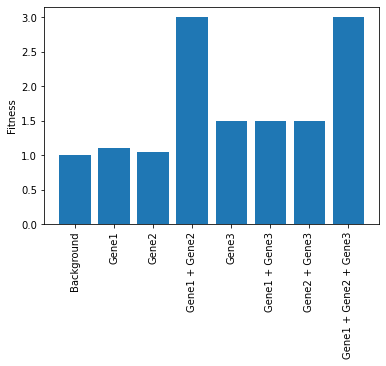

In [15]:
# Can see the difference using combine_array='max' instead of combine_array='multiply'
mut_gen2 = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0), 
                                  Gene('Gene2', FixedValue(1.05), synonymous_proportion=0),
                                  Gene('Gene3', UniformDist(1, 2), synonymous_proportion=0)],
                            
                            epistatics=[('Epi1', 'Gene1', 'Gene2', FixedValue(3))],
                            
                            multi_gene_array=True,
                            combine_array='max'
                           )
mut_gen2.plot_fitness_combinations()

# Diminishing returns

As a clone gains more mutations and becomes fitter, there may be less and less room for improvement.  
You can apply a transformation of the combined fitness effects of each mutation.   

In [16]:
from clone_competition_simulation import BoundedLogisticFitness

In [17]:
# Run a simulation with loads of mutations that multiply in fitness
mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.4), synonymous_proportion=0)], 
                           combine_mutations='multiply' 
                           )

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=1000,
               mutation_generator=mut_gen, mutation_rates=0.1,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

# You can see that the fitness values of the clones has become very high!
s.view_clone_info()[-10:]

,clone id,label,fitness,generation born,parent clone id,last gene mutated
1000,1000,0,2295.856929,99,985,Gene1
1001,1001,0,426.878854,99,806,Gene1
1002,1002,0,304.913467,100,860,Gene1
1003,1003,0,1639.897806,100,930,Gene1
1004,1004,0,304.913467,100,841,Gene1
1005,1005,0,1639.897806,100,930,Gene1
1006,1006,0,1171.355576,100,886,Gene1
1007,1007,0,1171.355576,100,891,Gene1
1008,1008,0,597.630396,100,863,Gene1
1009,1009,0,2295.856929,100,985,Gene1


In [18]:
# The final clones have many mutations, each multplying the fitness by 1.4 
# This compound interest of mutations can lead to very high fitness 
s.get_clone_ancestors(1009)

[1009,
 985,
 984,
 886,
 848,
 847,
 791,
 790,
 786,
 735,
 620,
 483,
 470,
 464,
 405,
 390,
 346,
 340,
 339,
 319,
 198,
 116,
 115,
 0,
 -1]

One (extreme) option to limit to growth of fitness values is to use the 'max' option.  
However, there is another option that enables diminishing returns to be applied.  

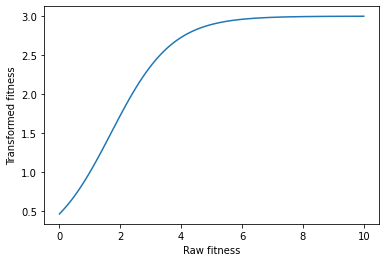

In [19]:
# This class places an upper bound on fitness. Here fitness cannot get above 3. 
b = BoundedLogisticFitness(3)
plt.plot(np.linspace(0, 10, 100), b.fitness(np.linspace(0, 10, 100)))
plt.xlabel('Raw fitness')
plt.ylabel('Transformed fitness');

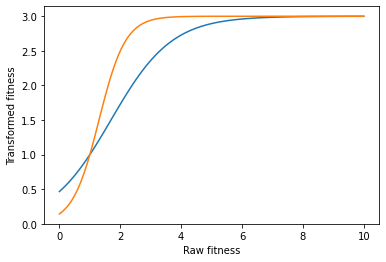

In [20]:
# The shape of this graph can also be altered. 
b = BoundedLogisticFitness(3)
plt.plot(np.linspace(0, 10, 100), b.fitness(np.linspace(0, 10, 100)))
b2 = BoundedLogisticFitness(3, 10)
plt.plot(np.linspace(0, 10, 100), b2.fitness(np.linspace(0, 10, 100)))
plt.xlabel('Raw fitness')
plt.ylabel('Transformed fitness');

In [21]:
# Run the simulation but limit the fitness
mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.4), synonymous_proportion=0)], 
                           combine_mutations='multiply', 
                            mutation_combination_class=BoundedLogisticFitness(3)   # This limits fitness to 3
                           )

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=1000,
               mutation_generator=mut_gen, mutation_rates=0.1,
               print_warnings=False)
s = p.get_simulator()
s.run_sim()

# Now those final clones have their fitness capped. 
# The raw fitness is also lower, since the fitness reduction also reduces the advantage of the fittest clones
# (which would then gain more subclones and become even fitter)
s.view_clone_info(include_raw_fitness=True)[-10:]

,clone id,label,fitness,generation born,parent clone id,last gene mutated,Gene1
1000,1000,0,2.926558,99,964,Gene1,5.378240
1001,1001,0,2.926558,99,357,Gene1,5.378240
1002,1002,0,2.999569,100,464,Gene1,10.541350
1003,1003,0,2.926558,100,716,Gene1,5.378240
1004,1004,0,2.926558,100,360,Gene1,5.378240
1005,1005,0,2.926558,100,691,Gene1,5.378240
1006,1006,0,2.222816,100,586,Gene1,2.744000
1007,1007,0,2.999994,100,611,Gene1,14.757891
1008,1008,0,2.991267,100,454,Gene1,7.529536
1009,1009,0,2.999569,100,953,Gene1,10.541350
